In [1]:
import pickle
import os
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd 
from sklearn.decomposition import PCA
import numpy as np
import random
import matplotlib.pyplot as plt
import umap

In [57]:
res_dir = './save/'
agents = ['MIR']
for agent in agents:
    agent_dir = res_dir + agent
    agent_res = []
    paths = []
    for f in os.listdir(agent_dir):
        f_path = os.path.join(agent_dir, f)
        paths.append(f_path)
    paths.sort()
    for i in paths:
        print(i)
        agent_res.append(pickle.load(open(i, 'rb')))

./save/ER/0.pkl
./save/ER/1.pkl
./save/ER/2.pkl
./save/ER/3.pkl
./save/ER/4.pkl


In [58]:
x = agent_res[4][0]
y = agent_res[4][1]

In [59]:
x_embd = TSNE().fit_transform(x)

#### Plot

In [60]:
tmp = {'1d': x_embd[:, 0], '2d': x_embd[:, 1], 'label':y}

In [61]:
df = pd.DataFrame(tmp)

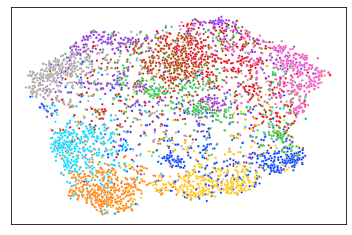

In [62]:
a = sns.scatterplot(
    x="1d", y="2d",
    hue="label",
    palette=sns.color_palette("bright", 10),
    data=df,
    s=5,
    legend=False
)
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticks=[])
a.set(yticks=[])

a.get_figure().savefig(agent+'.png', format='png', pad_inches=0.03, dpi=550, bbox_inches='tight')
#a.get_figure().savefig(agent+'.png', format='png', pad_inches=0, dpi=250, bbox_inches='tight')